In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.manifold import TSNE

## Upload tokens 

In [13]:
file_path = "/Users/flint/Data/recipe/italian/gz_recipe.csv"
R = pd.read_csv(filepath_or_buffer=file_path, index_col=0)
data = pd.read_csv("/Users/flint/Data/recipe/italian/tfidf.csv", index_col=0).T 

### Reduce dimensionality

In [14]:
X = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(data) 

In [15]:
Xs = pd.DataFrame(X, columns=['X', 'Y'])
Xs['category'] = R['Categoria']
Xs.head()

,X,Y,category
0,39.272438,-0.102167,Dolci
1,51.911007,-1.906266,Dolci
2,23.152449,78.735161,Dolci
3,38.879505,-1.166199,Dolci
4,3.491190,41.103970,Dolci


### Visualize

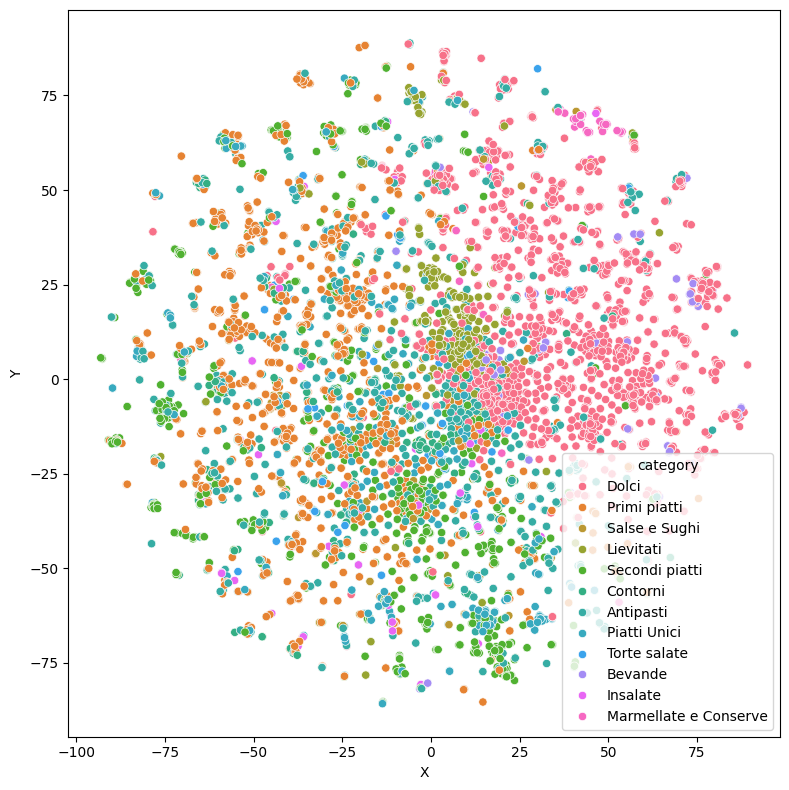

In [16]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(data=Xs, x="X", y="Y", hue='category', ax=ax)
plt.tight_layout()
plt.show()

### Classifier explanation

In [18]:
from bornrule import BornClassifier
from sklearn.model_selection import train_test_split

In [19]:
categories = [x if not pd.isnull(x) else 'Nessuna' for x in R['Categoria'].values]

In [20]:
data.head(2)

,tiramisù,\n,mascarpone,",",uova,savoiardi,zucchero,caffè,cacao,amaro,...,spegnetela,integraleaggiungeto,bennettons,ambientare,infondere,daiquiri,dela,bicchieri,raffreddira,emulsionatere
0,0.048626,0.0,0.04976,0.000030,0.003557,0.01639,0.009726,0.036545,0.018727,0.018428,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.00000,0.000039,0.007136,0.00000,0.019513,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
X_train, X_test, y_train, y_test = train_test_split(data, categories, test_size=0.33, random_state=42)

In [24]:
born = BornClassifier()

In [25]:
born.fit(X_train, y_train)

/Users/flint/.pyenv/versions/3.9.17/envs/nlp/lib/python3.9/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but BornClassifier was fitted without feature names
  warnings.warn(


BornClassifier()

## Evaluation

In [26]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [27]:
y_pred = born.predict(X_test)

/Users/flint/.pyenv/versions/3.9.17/envs/nlp/lib/python3.9/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but BornClassifier was fitted without feature names
  warnings.warn(


In [28]:
print(classification_report(y_true=y_test, y_pred=y_pred, zero_division=0))

                       precision    recall  f1-score   support

            Antipasti       0.84      0.50      0.62       302
              Bevande       0.60      0.92      0.73        26
             Contorni       0.64      0.76      0.69        58
                Dolci       0.94      0.93      0.94       544
             Insalate       0.33      1.00      0.49        22
            Lievitati       0.70      0.99      0.82       101
Marmellate e Conserve       0.62      0.91      0.74        22
              Nessuna       0.00      0.00      0.00         0
         Piatti Unici       0.53      0.55      0.54        88
         Primi piatti       0.91      0.85      0.88       425
        Salse e Sughi       0.61      0.53      0.57        32
       Secondi piatti       0.80      0.74      0.77       301
         Torte salate       0.47      0.77      0.58        39

             accuracy                           0.79      1960
            macro avg       0.61      0.73      0.64 

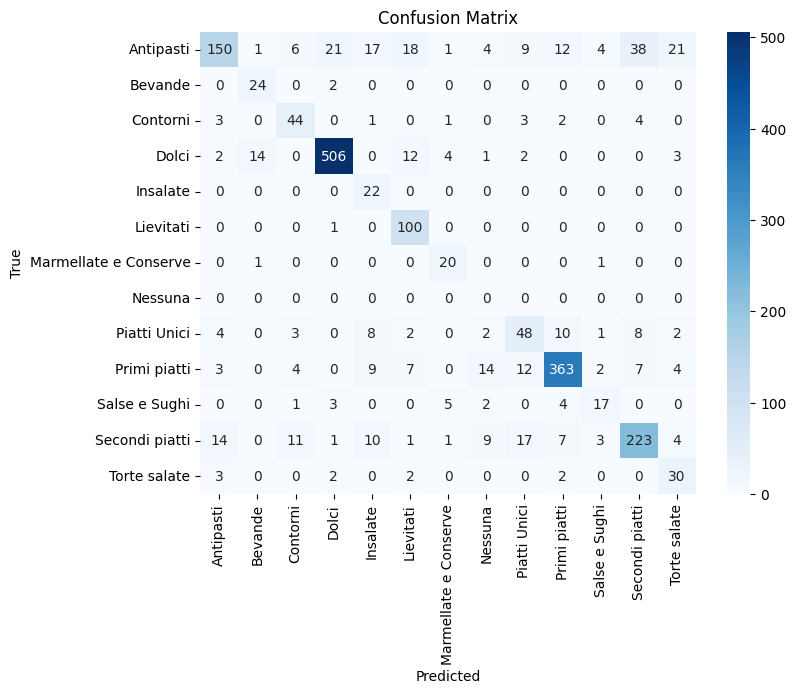

In [29]:
cm = confusion_matrix(y_test, y_pred, labels=born.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=born.classes_, yticklabels=born.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Explanation

In [30]:
born.classes_

array(['Antipasti', 'Bevande', 'Contorni', 'Dolci', 'Insalate',
       'Lievitati', 'Marmellate e Conserve', 'Nessuna', 'Piatti Unici',
       'Primi piatti', 'Salse e Sughi', 'Secondi piatti', 'Torte salate'],
      dtype='<U21')

In [31]:
global_e = pd.DataFrame(born.explain(), index=data.columns, columns=born.classes_)

In [33]:
global_e['Dolci'].sort_values(ascending=False).head(20)

cioccolato    0.062993
biscotto      0.051704
velo          0.046703
torta         0.045187
caffè         0.044449
nutella       0.042113
cacao         0.039263
fondente      0.036628
meringa       0.035425
frolla        0.034275
gelatina      0.032971
vaniglia      0.031237
confettura    0.031182
gelato        0.031083
lievito       0.030471
pavesini      0.030448
cheesecake    0.028815
pancake       0.027989
cake          0.027971
spagna        0.027517
Name: Dolci, dtype: float64

In [34]:
local_e = pd.DataFrame(born.explain([data.iloc[0]]), index=data.columns, columns=born.classes_) 

,Antipasti,Bevande,Contorni,Dolci,Insalate,Lievitati,Marmellate e Conserve,Nessuna,Piatti Unici,Primi piatti,Salse e Sughi,Secondi piatti,Torte salate
tiramisù,0.000000e+00,0.000000e+00,0.000000e+00,4.522388e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
\n,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
mascarpone,1.728936e-03,0.000000e+00,0.000000e+00,4.096239e-03,0.000000e+00,1.713389e-03,0.000000e+00,0.000000e+00,0.000000e+00,1.856086e-03,0.000000e+00,9.295409e-04,0.000000e+00
",",1.378349e-07,1.196518e-07,1.466795e-07,1.301706e-07,1.465608e-07,1.334014e-07,1.055777e-07,1.488108e-07,1.396457e-07,1.447906e-07,1.487973e-07,1.454117e-07,1.418616e-07
uova,2.999206e-04,0.000000e+00,9.360794e-05,3.734754e-04,8.686835e-05,2.578872e-04,0.000000e+00,2.431070e-04,2.266383e-04,1.940030e-04,8.081753e-05,2.740536e-04,3.911077e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
daiquiri,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
dela,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
bicchieri,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
raffreddira,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [37]:
local_e['Bevande'].sort_values(ascending=False).head(20)

caffè          0.012033
cacao          0.005176
amaro          0.004392
savoiardo      0.002894
moka           0.002262
montate        0.001662
zucchero       0.001598
elettrico      0.001460
vetro          0.001380
crema          0.001367
montare        0.001296
polvere        0.001204
sac            0.001010
à              0.000924
separate       0.000794
neve           0.000742
beccuccio      0.000740
frusta         0.000681
dovrete        0.000674
ottenere ne    0.000666
Name: Bevande, dtype: float64